# Week 6: Using Pandas to Analyze Diamonds Data #

### The Dataset: ###

For this assignment, the objective is to analyze the Diamonds dataset by using pandas. Pandas will be used to plot some charts to do some exploratory data analysis (EDA) with the dataset.

This dataset has 53,940 rows and has 10 attributes. These are: price (in US dollars and is a numeric and continuous variable), carat (numeric and continuous), cut with values Fair, Good, Very Good, Premium, and Ideal (categorical and nominal), color with values J (worst) to D (best) (categorical and ordinal), clarity with values I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best) (categorical and ordinal), x which is the length in mm (numeric and continuous), y which is the width in mm (numeric and continuous), z depth in mm (numeric and continuous), depth which is the total depth in percentage (numeric and continuous), and table which is the width of top of diamond relative to widest point (numeric and continuous).

### Data Initialization: ###

In [2]:
import pandas as pd
import numpy as np

diamonds = pd.read_csv('https://raw.githubusercontent.com/doryaswi/DAV-5400/master/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Checking for null values: ###

In [3]:
diamonds.columns[diamonds.isnull().any()]

Index([], dtype='object')

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Checked if there are some null or missing values that need to be handled before analyzing the data. Based on the results above, the dataset does not contain any null or missing values.

### Task/Question 1: What proportion of diamonds are between .30 and 1.08 carats? ###

Since carats is a numeric and continuous variable, a histogram can be created to estimate the proportion of diamonds that are between 0.30 and 1.08 carats. In addition to this, calculations can also be done to find this. In order to calculate for this, the following steps need to be completed:
1. Filter and create a new dataframe that only contains records with diamonds having carats between 0.30 and 1.08.
2. Count the size of this filtered dataframe.
3. Count the size of the original dataframe.
4. Use formula: size of dataframe with diamonds having carats between 0.30 and 1.08/size of original dataframe.

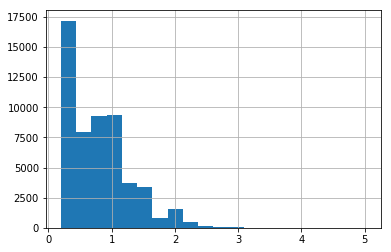

In [40]:
#creates and displays histogram of the carats attribute and number of records in a given carats range
carat_hist = diamonds['carat'].hist(bins=20)
carat_hist;

Although it is somehow difficult to estimate or get the actual proportion of diamonds with carats between 0.30 and 1.08, it can be clearly seen that a vast majority of the diamonds in the dataset falls within this range.

In [6]:
#filters dataframe and creates a new one that only contains diamonds having carats between 0.30 and 1.08 (inclusive)
#counts the size of this dataframe
carat = diamonds[(diamonds['carat']>=0.30) & (diamonds['carat']<=1.08)].count()['carat']
print(carat/diamonds.count()['carat']) #calculates proportion of the diamonds having carats between 0.30 and 1.08

0.7468298109010011


**Answer to Task/Question1:** The proportion of diamonds having carats between 0.30 and 1.08 inclusive is 0.7468 or 0.75. This means that over 50% or to be more specific, almost 75% of the diamonds dataset has carats that falls within this range.

### Task/Question 2: How many of the diamonds have equal x and y dimensions? ###

In order to answer this task/question, a new dataframe was created from the original dataframe such that, the new dataframe will only contain the diamonds that have equal x and y dimensions. Afterwards, the size of this new dataframe was printed.

In [7]:
x_y = diamonds[(diamonds['x']==diamonds['y'])] #filters data to only contain diamonds where x and y dimensions are equal
print(len(x_y)) #gets size of the new dataframe and prints it out

17


**Answer to Task/Question2:** There are 17 diamonds whose x and y dimensions are the same (equal).

### Task/Question 3: How many of the diamonds have a carat less than the mean carat value? ###

To answer this task/question, a descriptive statistics of the carat column was ran first, again this is because carat is a numeric and continuous variable and running descriptive statistics. Second, a new dataframe was created from the original dataframe. This new dataframe is the result of filtering only those diamonds having carat less than the mean value.

In [8]:
diamonds.describe()['carat'] #gets descriptive statistics for carat column only

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

Based on the results of the descriptive statistics, since the mean is equal to 0.7979 and median is at 0.70, which therefore says that our mean is less than the median which is already 50% of our data, we should expect that the actual result will be a number of records that is more than 50% of the total number of records in the dataset.

In [9]:
#creates a new data frame that filters dataset to only have diamonds with carat less than the mean and then calculates the 
#size of the new data frame
carat_mean = diamonds[diamonds['carat']<diamonds.mean()['carat']].count()['carat']
carat_mean

31127

**Answer to Task/Question 3:** There are 31,127 diamonds in the dataset with carat less than that of the mean value. This is about 57% of the data which is expected based on the results of the descriptive statistics mentioned above.

### Task/Question 4: How many diamonds have a Premium cut or better? Note that the possible values for the quality of  cut are ranked in ascending order as follows: Fair/Good/Very Good/Premium/Ideal ###

For this question, the following steps were done:
1. A bar graph was plotted. By doing so, we will be able to get a rough estimate of how many diamonds have a Premium cut or better. In this case it will be all diamonds having a Premium or Ideal cut.
2. To be able to get the actual numbers, a new dataframe was created from the original dataframe. The new data frame filters only the diamonds that have a Premium or Ideal cut.
3. Get size of the data frame to get the number of diamonds with Premium cut or better.

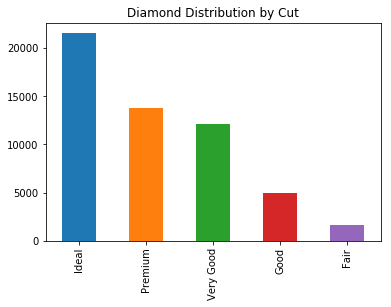

In [10]:
#creates a bar graph of the diamonds by cut
cut_bar = diamonds['cut'].value_counts().plot.bar(title='Diamond Distribution by Cut')

Based on this bar graph, it can be easily seen that most of the diamonds in the dataset have either a Premium cut or better (Ideal). This is because on the bar graph, it is evident that Ideal and Premium cuts are both the top 2 highest cuts in the dataset.

In [11]:
#filters, creates, and counts the number of diamonds that have a Premium or Ideal cut
cut = diamonds[(diamonds['cut']=='Premium') | (diamonds['cut']=='Ideal')].count()['cut']
cut

35342

**Answer to Task/Question 4:** As expected, the number of diamonds that have a Premium cut or better is more than 50% of the dataset. The actual number of diamonds that have a Premium cut or better is 35,342.

### Task/Question 5: Which diamond has the highest price per carat? What is its value?

These steps will be completed to answer the question above:
1. A copy of the original data frame will be created.
2. A new column will be created that will store the price per carat using the formula: price/carat
3. After calculating the price/carat, the maximum value of the new column will then be calculated.

In [12]:
diamonds1 = diamonds.copy() #creates copy of the original dataset
diamonds1.head() #prints sample of the new copy

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
diamonds1['price/carat'] = diamonds1.price/diamonds1.carat #creates new column in diamonds 1 to calculate price/carat
diamonds1.head() #prints sample of dataframe copy with the new column price/carat

,carat,cut,color,clarity,depth,table,price,x,y,z,price/carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


In [14]:
max_price_carat = diamonds1['price/carat'].max() #gets the value of the maximum price per carat
index_max_price_carat = diamonds1['price/carat'].idxmax() #finds the row index of the diamond that has this value
rec_max_price_carat = diamonds1.iloc[27635] #gets details of the diamond with max price per carat

print(max_price_carat)
print(index_max_price_carat)
print(rec_max_price_carat)

17828.846153846152
27635
carat               1.04
cut            Very Good
color                  D
clarity               IF
depth               61.3
table                 56
price              18542
x                   6.53
y                   6.55
z                   4.01
price/carat      17828.8
Name: 27635, dtype: object


**Answer to Task/Question 5:** The maximum value price per carat for this dataset is 17,828.85/carat. The diamond that has this characteristic is found to have an index of 27635. After digging dipper, it is found out that this diamond is 1.04 carats with a price of 18,542. Although the cut is only "Very Good", the reason for it being expensive in terms of price/carat among all the diamonds is probably because it has the "IF" clarity code, which is the best clarity code according to the definition of clarity.

### Task/Question 6: Make a bar plot of the "cut" data. What does it tell us about the frequencies of the individual cut values within the data set? ###

This question does not require any transformation. To answer the question, a bar graph was just created as follows:

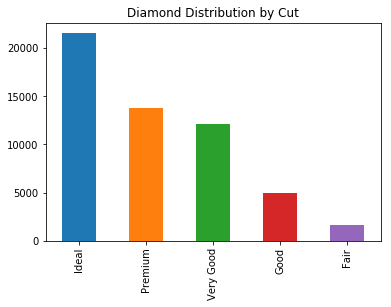

In [15]:
#creates a bar graph of the diamonds by cut
cut_bar = diamonds['cut'].value_counts().plot.bar(title='Diamond Distribution by Cut')

**Answer to Task/Question 6:** It is interesting to find that based on the bar graph above, the frequency of the individual cut values was distributed according to the one that has the highest quality to the one that has the lowest quality. This means that Ideal, which is considered as the best cut has the highest frequency while Fair, which is considered as the worst cut has the lowest frequency.

### Task/Question 7: Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance of the boxplots. ###

This question does not require any transformation. To answer the question, a boxplot was just created as follows:

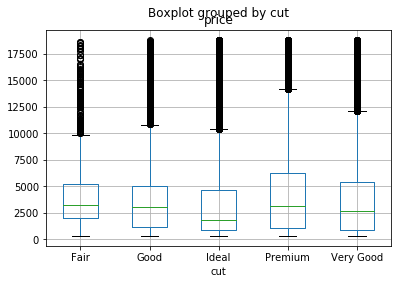

In [16]:
box_price_cut = diamonds.boxplot(column=['price'],by='cut') #creates a boxplot for price by cut

**Answer to Task/Question 7:** Based on the boxplots, the following are some of the conclusions you can make:
1. the "Ideal" cut which is the best cut had the lowest median price as compared to the rest of the cuts. 
2. the median price value for "Premium", "Fair", and "Good" cuts are almost equal. But, "Premium" cut is slightly higher than the two and has the highest median price value.
3. it seems that the price distribution for all cuts is skewed to the right.
4. all the cuts have a lot of outliers/extreme values except for Premium. Ideal cut and Fair has the highest number of outliers/extreme values.
5. the range of the prices for all cuts seems to be really wide.

### Task/Question 8: Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can draw from the shape of the resulting distributions. ###

To accomplish this task, histograms for each attribute were created. The following columns were used to generate the histograms based on the data dictionary:
length = x column,
width = y column,
depth = z column, and 
total depth = depth column

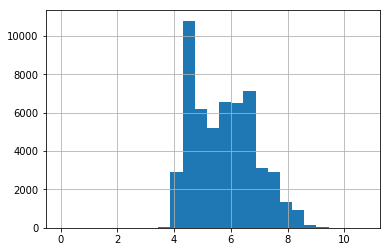

In [24]:
hist_length = diamonds['x'].hist(bins=25) #creates histogram for length

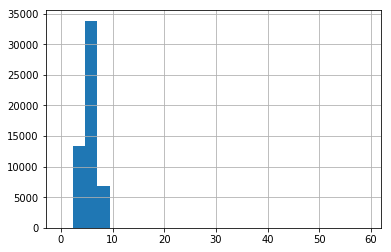

In [25]:
hist_width = diamonds['y'].hist(bins=25) #creates histogram for width

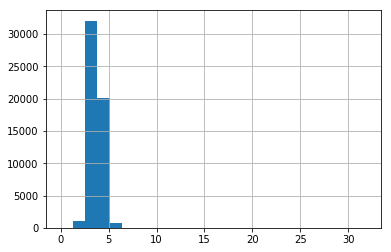

In [26]:
hist_depth = diamonds['z'].hist(bins=25) #creates histogram for depth

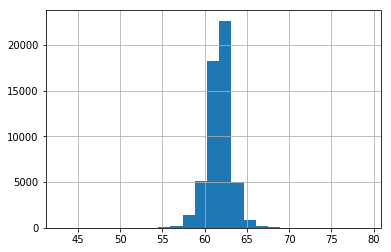

In [27]:
hist_totdepth = diamonds['depth'].hist(bins=25) #creates histogram for total depth

**Answer to Task/Question 8:** The following are some conclusions based on the shape of the resulting distributions for each attribute:
1. Length: Although the highest length distribution will be from the range between 4mm to 5mm, the shape of the curve is almost a bell curve however, it is still slightly skewed to the right.
2. Width: It is evident that the range between 5mm and 6mm has the highest width distribution. The shape of the curve also is almost a bell curve but it has a very high peak because of the high width distribution on the 5mm and 6mm range.
3. Depth: The shape of the distribution for this attribute is really close to being a bell curve or normally distributed. You can definitely see the symmetry on the end tails. The only thing is that it has a very high distribution between the 3mm and 4mm range of values.
4. Total Depth: The shape of the distribution for this attribute is also really close to a bell curve or normally distributed. It is almost symmetrical it just have a high peak due between the 62 to 64 range of values.

### Task/Question 9: Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes? ###

This question does not require any transformation. To answer the question, a scatter plot was just created as follows and the correlation was also calculated:

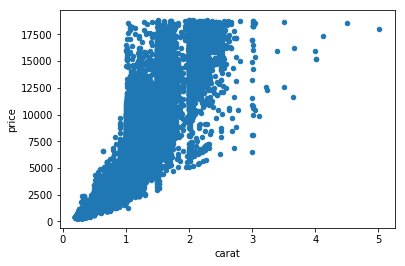

In [28]:
scatter_price_carat = diamonds.plot.scatter(x='carat',y='price') #creates scatter plot for price vs. carat

In [39]:
scat_price_carat = diamonds[['price','carat']] #creates new data frame that only has price and carat columns
price_carat_mat = scat_price_carat.corr() #calculates correlation matrix
price_carat_mat.iloc[0,1] #gets only the correlation for price and carat

0.9215913011935697

**Answer to Task/Question 9:** By looking at the scatter plot above, it is evident that carat has a strong positive relationship with price. This means that as the carat goes up, the price also goes up. In addition, upon getting the correlation between price and carat, the result was 0.92 which confirms that there is really a strong relationship between this two attributes.